# 경사 하강법(Gradient Descent)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

# y = 4X + 6 식을 근사 (w1=4, w0=6).random 값은 Noise를 위해 만듬
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

In [13]:
print(len(X))
X

100


array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [14]:
print(len(y))
y

100


array([[ 9.22535819],
       [12.62234142],
       [11.28776945],
       [ 8.82282178],
       [10.87749059],
       [13.06304208],
       [10.67947726],
       [12.95425917],
       [12.63854946],
       [10.12198388],
       [11.93062336],
       [11.45360443],
       [10.75263147],
       [14.38141214],
       [ 6.92465486],
       [ 7.40360757],
       [ 6.1722472 ],
       [14.44682926],
       [12.3521661 ],
       [13.36208655],
       [15.71209743],
       [11.04550945],
       [ 8.4213499 ],
       [13.21363012],
       [ 5.773072  ],
       [13.06298936],
       [ 6.73320732],
       [12.80989652],
       [12.0977286 ],
       [10.79781031],
       [ 9.98400386],
       [13.09991417],
       [ 8.78797697],
       [12.45753654],
       [ 5.88231503],
       [11.74354037],
       [11.84401775],
       [10.78046188],
       [14.164064  ],
       [12.37676906],
       [ 9.25248874],
       [ 8.39685484],
       [11.87928774],
       [ 7.80818967],
       [10.63956586],
       [11

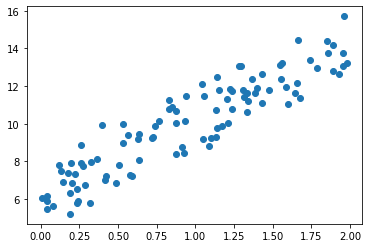

In [15]:
# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

## 경사하강법 구현

In [16]:
# W1과 W0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [17]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_Steps(X, y, iters=10000):
    #w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()호출하여 w1, w0업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        print(w1, w0)
    return w1, w0

In [18]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N #오차값
    return cost

w1, w0 = gradient_descent_Steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X +w0
print('GDTC:{0:.4f}'.format(get_cost(y, y_pred)))

[[0.21502681]] [[0.1994937]]
[[0.42100578]] [[0.39093099]]
[[0.61831123]] [[0.57464412]]
[[0.80730201]] [[0.75095159]]
[[0.98832217]] [[0.92015876]]
[[1.1617015]] [[1.08255838]]
[[1.32775621]] [[1.2384311]]
[[1.48678941]] [[1.38804598]]
[[1.6390917]] [[1.53166097]]
[[1.78494168]] [[1.66952335]]
[[1.92460643]] [[1.80187021]]
[[2.05834199]] [[1.92892882]]
[[2.18639383]] [[2.05091709]]
[[2.30899728]] [[2.16804391]]
[[2.42637792]] [[2.28050955]]
[[2.53875204]] [[2.38850599]]
[[2.64632698]] [[2.49221732]]
[[2.74930151]] [[2.59181999]]
[[2.8478662]] [[2.68748318]]
[[2.94220372]] [[2.77936908]]
[[3.03248922]] [[2.86763316]]
[[3.11889059]] [[2.95242451]]
[[3.2015688]] [[3.03388603]]
[[3.28067816]] [[3.11215473]]
[[3.35636659]] [[3.18736196]]
[[3.42877592]] [[3.25963365]]
[[3.49804211]] [[3.32909051]]
[[3.56429551]] [[3.39584829]]
[[3.62766106]] [[3.46001795]]
[[3.68825855]] [[3.52170586]]
[[3.74620283]] [[3.58101401]]
[[3.801604]] [[3.63804016]]
[[3.85456759]] [[3.69287806]]
[[3.90519478]] [[3

[[4.46514715]] [[5.66238035]]
[[4.46354878]] [[5.66418268]]
[[4.46195553]] [[5.6659792]]
[[4.4603674]] [[5.66776991]]
[[4.45878436]] [[5.66955485]]
[[4.45720639]] [[5.67133402]]
[[4.4556335]] [[5.67310745]]
[[4.45406565]] [[5.67487516]]
[[4.45250283]] [[5.67663717]]
[[4.45094503]] [[5.67839349]]
[[4.44939223]] [[5.68014414]]
[[4.44784442]] [[5.68188915]]
[[4.44630157]] [[5.68362853]]
[[4.44476368]] [[5.6853623]]
[[4.44323073]] [[5.68709048]]
[[4.44170271]] [[5.68881309]]
[[4.44017959]] [[5.69053014]]
[[4.43866136]] [[5.69224166]]
[[4.43714801]] [[5.69394766]]
[[4.43563953]] [[5.69564816]]
[[4.43413589]] [[5.69734317]]
[[4.43263708]] [[5.69903272]]
[[4.43114309]] [[5.70071683]]
[[4.4296539]] [[5.70239551]]
[[4.4281695]] [[5.70406878]]
[[4.42668987]] [[5.70573665]]
[[4.42521499]] [[5.70739915]]
[[4.42374486]] [[5.7090563]]
[[4.42227945]] [[5.7107081]]
[[4.42081875]] [[5.71235458]]
[[4.41936275]] [[5.71399575]]
[[4.41791143]] [[5.71563164]]
[[4.41646478]] [[5.71726226]]
[[4.41502278]] [[5

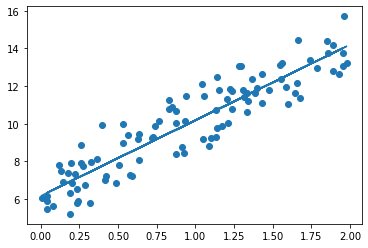

In [19]:
plt.scatter(X, y)
plt.plot(X, y_pred)

# sklearn.linear_model.LinearRegression
- 선형회귀모델
- class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

### Attributes
- coef_array of shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

[67.30998637]


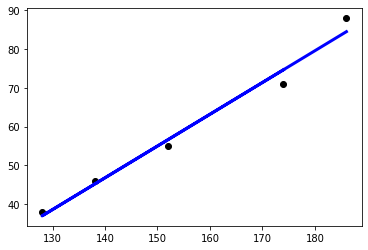

In [24]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
reg.fit(X, y)                            #학습

print(reg.predict([[165]]))

#학습 데이터와 y값을 산포도로 그린다.
plt.scatter(X, y, color = 'black')

#학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다.
# 계산된 기울기와 y절편을 가지는 직선이 그려진다.
plt.plot(X, y_pred, color='blue', linewidth = 3)
plt.show()

In [25]:
print(reg.predict([[197]]))

[93.55674847]


## 당뇨병 환자들의 형당수치 예측

In [30]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

#당뇨병 데이터 세트 적재
diabetes = load_diabetes()

#학습 데이터와 테스트 데이터를 분리한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                   test_size=0.2, random_state=0)

# 선형 회귀 모델로 학습 수행
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

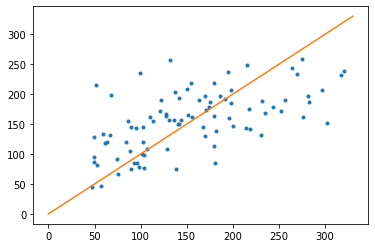

In [31]:
#테스트 데이터로 예측
y_pred = model.predict(X_test)

#실제 데이터와 예측 데이터 비교
plt.plot(y_test, y_pred, '.')

#직선을 그리기 위하여 완벽한 선형 데이터를 생성한다.
x = np.linspace(0, 330, 100)
y = x
plt.plot(x,y)
plt.show()

In [35]:
import pandas as pd

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [36]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<AxesSubplot:>

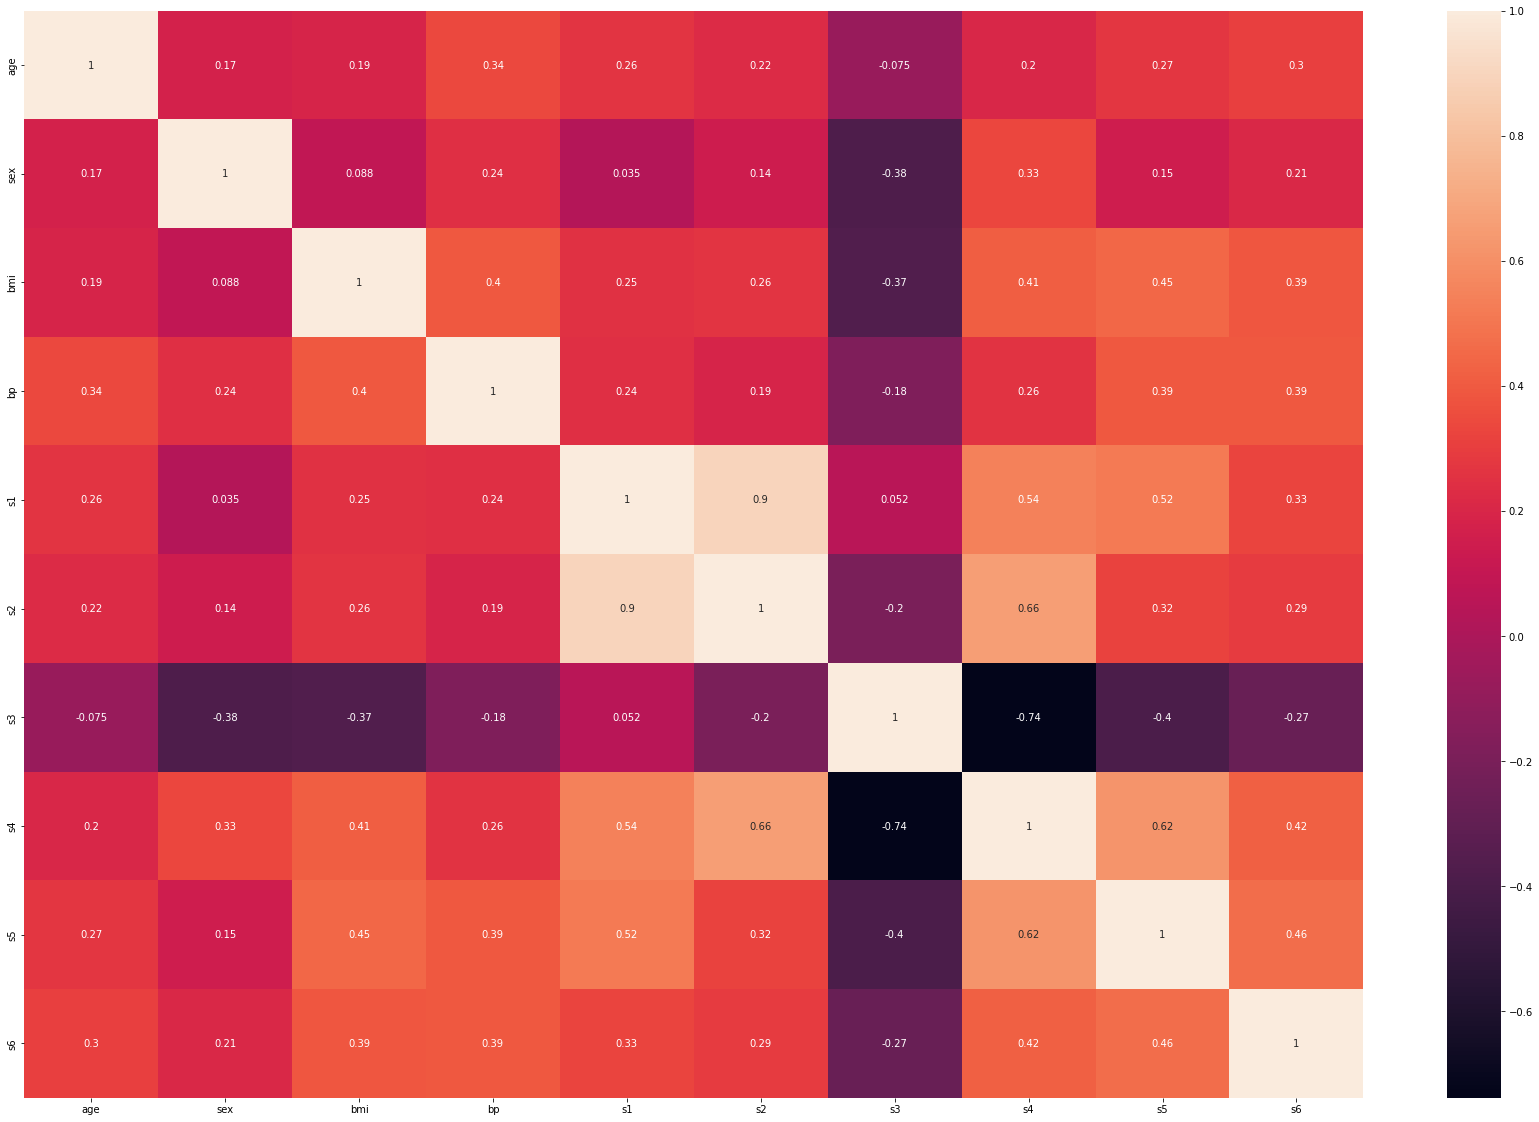

In [40]:
import seaborn as sns

plt.figure(figsize=(30, 20)) 
sns.heatmap(df.corr(), annot=True)


In [43]:
df_pre = df.drop(['s2'], axis=1)

## LinearRegression 이용한 보스턴 주택가격 예측

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data , columns=boston.feature_names)

# boston dataet의 target array는 주택 가격, PRICE컬럼으로 DataFrame에 존재
bostonDF['PRICE'] = boston.target

print(bostonDF.shape)
bostonDF.head()

(506, 14)


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### MinMaxScale해준 값에 대해서 비교

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(bostonDF)

boston_scalered = scaler.transform(bostonDF)
boston_scalered_df = pd.DataFrame(bostonDF, columns = boston.feature_names)

print(boston_scalered_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. asx는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=5, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = boston.drop(['PRICE'], axis = 1, inplace=False)

X_train, X_test, ty_train, y_test = train_test_split(X_data, y_target, test_size=0.3,)

In [ ]:
# corf = 회귀계수, intercept = 편향값